# Linear Discriminant Analysis (LDA)

### It is a technique use to reduce the dimension of data by creating new line and projecting the data on it and and getting the maximum seperable distance between the categories

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris

In [2]:
gene_lst=['x','y']
genes=['gene'+val for val in gene_lst]
rand_val=np.random.normal(1.0,2.0,20)
work=[ 1 if(i>0.5) else 0 for i in rand_val]


In [5]:
df_two=pd.DataFrame(columns=[*genes])
df_two

,genex,geney


In [6]:
df_two['Work']=work

In [8]:
df_two.head()

,genex,geney,Work
0,NaN,NaN,1
1,NaN,NaN,0
2,NaN,NaN,0
3,NaN,NaN,0
4,NaN,NaN,1


In [77]:
# debuging 
#for i in range(20):
 #   print(df_two.index[i])
#    break
#print(df_two.index.shape)
#print(len(df_two.drop('Work',axis=1)))
#print(len(unique))
# print(df_two)
#print(df_two['genex'].dtype,df_two['geney'].dtype,df_two['Work'].dtype)

In [14]:
for i in range(0,20):
    df_two.loc[df_two.index[i],'genex']=np.random.normal(1.0,2.0,1)
    df_two.loc[df_two.index[i],'geney']=np.random.normal(2.0,1.0,1)

In [15]:
df_two

,genex,geney,Work
0,3.470776159670441,0.5681685950554431,1
1,-1.3816328018294897,2.2247442097933203,0
2,0.7304304077634903,1.9307970957659626,0
3,4.485365160107141,1.351948184473263,0
4,1.9290367230048793,1.4111586146601085,1
5,0.2144941858529572,1.5904806908591707,0
6,0.8614100564697147,2.3989262569243044,1
7,0.9638595532125193,0.6520622194627006,0
8,2.4001630015856072,1.9549824388448047,0
9,2.173210911016052,0.9359575231022392,0


In [25]:
x=df_two[['genex','geney']]
y=df_two['Work']
unique=np.unique(df_two['Work'])
n_feature=2 # two column as input x
n_com=min(n_feature,len(unique)-1)

In [26]:
lda=LinearDiscriminantAnalysis(n_components=n_com)
x_lda=lda.fit_transform(x,y)

In [27]:
print(x_lda)

[[ 2.037052  ]
 [-1.42050969]
 [-0.28438618]
 [ 1.78405126]
 [ 0.66504844]
 [-0.2060319 ]
 [-0.6339234 ]
 [ 0.91737517]
 [ 0.39223689]
 [ 1.17740806]
 [ 0.70044261]
 [-0.83689535]
 [ 0.7744997 ]
 [ 0.30633092]
 [-1.68250451]
 [-1.0033278 ]
 [-0.67810505]
 [-0.38104307]
 [-0.52229591]
 [-1.1054222 ]]


In [41]:
df_two['genex']=df_two['genex'].astype(float)
df_two['geney']=df_two['geney'].astype(float)
unique_count=df_two.groupby(['Work'])[['genex','geney']].value_counts()

In [59]:
#unique_count[0].index  
for i in unique_count[0].index:
    print(i[0])
    break

print(x_lda)

-1.3816328018294897
[[ 2.037052  ]
 [-1.42050969]
 [-0.28438618]
 [ 1.78405126]
 [ 0.66504844]
 [-0.2060319 ]
 [-0.6339234 ]
 [ 0.91737517]
 [ 0.39223689]
 [ 1.17740806]
 [ 0.70044261]
 [-0.83689535]
 [ 0.7744997 ]
 [ 0.30633092]
 [-1.68250451]
 [-1.0033278 ]
 [-0.67810505]
 [-0.38104307]
 [-0.52229591]
 [-1.1054222 ]]


In [56]:
genex_nw=[]
geney_nw=[]
for val in unique_count[0].index:
    genex_nw.append(val[0])
    geney_nw.append(val[1])

genex_w=[]
geney_w=[]
for val in unique_count[1].index:
    genex_w.append(val[0])
    geney_w.append(val[1])

In [70]:
print(x_lda[y==class_label,0])
print(np.zeros_like(x_lda[y == class_label, 0]))
print(class_label)

[ 2.037052    0.66504844 -0.6339234   0.70044261  0.30633092]
[0. 0. 0. 0. 0.]
1


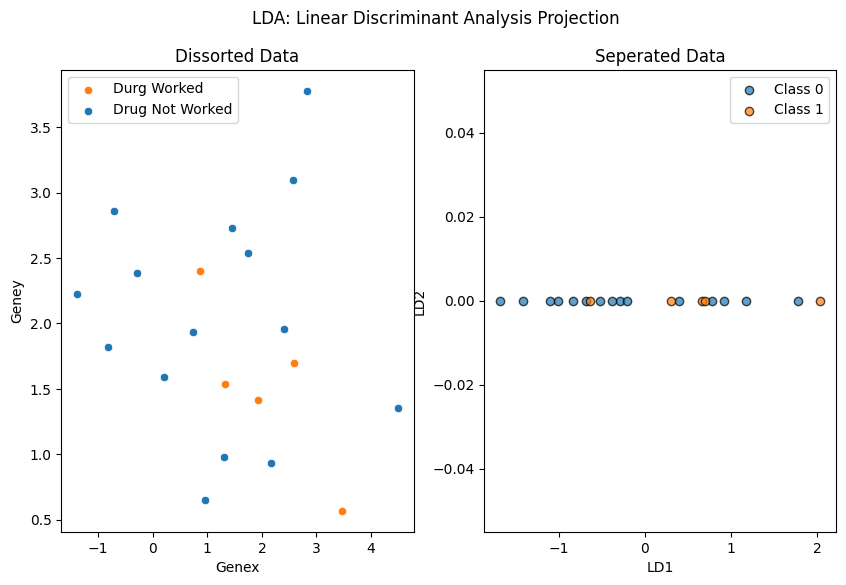

In [76]:
fig,ax=plt.subplots(ncols=2,figsize=(10,6),sharex=False,sharey=False)

sns.scatterplot(x=genex_w,y=geney_w,color='tab:orange',label='Durg Worked',ax=ax[0]) #work
sns.scatterplot(x=genex_nw,y=geney_nw,color='tab:blue',label='Drug Not Worked',ax=ax[0]) # not work 
ax[0].set(xlabel='Genex',ylabel='Geney',title='Dissorted Data')
ax[0].legend()


for class_label in np.unique(y):
    ax[1].scatter(x=x_lda[y==class_label,0],y=np.zeros_like(x_lda[y==class_label,0]),  label=f'Class {class_label}',alpha=0.7,edgecolors='k')

ax[1].set(xlabel='LD1',ylabel='LD2',title='Seperated Data')
ax[1].legend()
plt.suptitle('LDA: Linear Discriminant Analysis Projection')
plt.show()
